### CIC is looking for you to make suggestions about potential “rules” that they could implement with Jornaya data to positively impact their lead-buying strategy. For example, these are some good questions and points to start with:
- Based on the data available, is there a certain type of lead that CIC should not bother purchasing?
- Are there consumers that CIC should prioritize purchase and trying to contact? 
- What are the characteristics of the leads that CIC should not and should prioritize purchasing, and how can they implement rules using Jornaya data to distinguish these leads?
- How much of a difference does having Jornaya data available make vs. not having it available?
- Remember we are aiming to prove Jornaya’s data can have a meaningful and valuable impact to CIC, so showing numbers for how these rules can affect CIC will increase the strength of your story.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import wrangle

In [2]:
df = pd.read_csv('clean_CIC.csv').set_index('token')

In [3]:
df.head()

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d
token,,,,,,,,,,,,
1,C,50,0,0,74,962,10,2,0,0,1,0
2,C,50,0,0,47,617,9,3,0,0,1,0
3,A,75,0,0,7,94,14,1,1,0,0,0
4,C,75,0,0,29,104,15,1,0,0,1,0
5,D,75,0,0,27,82,9,1,0,0,0,1


In [4]:
df.shape

(554, 12)

___

## Make more dummies to explore with

### Lead cost

In [5]:
# dummy lead cost feature
dummy_df =  pd.get_dummies(df['lead_cost'])
# name the new columns (goes in order of value counts high to low)
dummy_df.columns = ['lead_costs_25', 'lead_costs_50', 
                    'lead_costs_75', 'lead_costs_100']
# concat the dummies to the main data frame
df = pd.concat([df, dummy_df], axis=1)

### Competitors

In [6]:
# dummy competitors feature
dummy_df =  pd.get_dummies(df['competitors'])
# name the new columns (goes in order of value counts high to low)
dummy_df.columns = ['competitors_0', 'competitors_1', 
                    'competitors_2', 'competitors_3']
# concat the dummies to the main data frame
df = pd.concat([df, dummy_df], axis=1)

___

## Split the data

In [7]:
train, validate, test = wrangle.split_CIC(df)
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test) 
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

___

## Competitors

<AxesSubplot:xlabel='competitors', ylabel='count'>

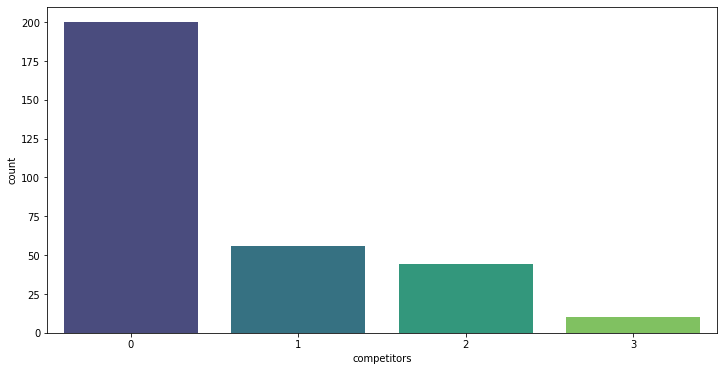

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x=df.competitors, palette='viridis')

<AxesSubplot:xlabel='competitors', ylabel='count'>

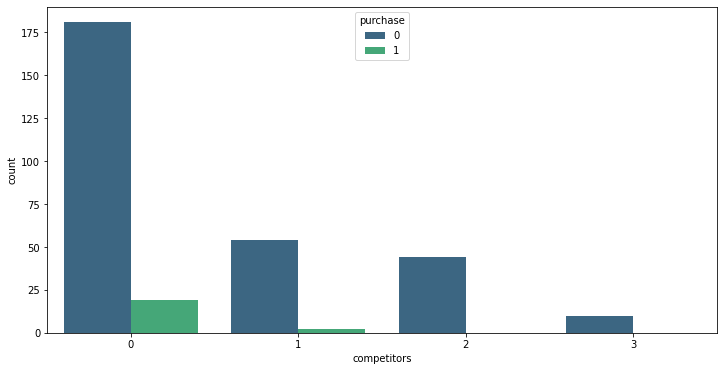

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x=train.competitors, hue='purchase', palette='viridis')

In [31]:
zero = df[(df.competitors == 0)]
zero.shape

(362, 20)

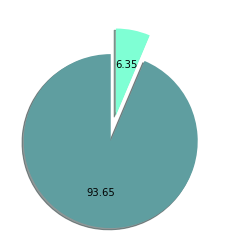

In [38]:
explode = (0.3, 0)  
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']

plt.pie(zero['purchase'].value_counts(), 
        startangle=90, autopct='%.2f', shadow=True,
        explode=explode, colors=colors)
plt.show()

In [32]:
one = df[(df.competitors == 1)]
one.shape

(91, 20)

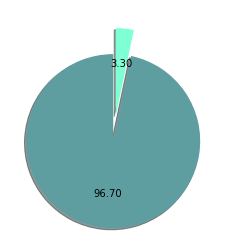

In [39]:
explode = (0.3, 0)  
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']

plt.pie(one['purchase'].value_counts(), 
        startangle=90, autopct='%.2f', shadow=True,
        explode=explode, colors=colors)
plt.show()

In [33]:
two = df[(df.competitors == 2)]
two.shape

(84, 20)

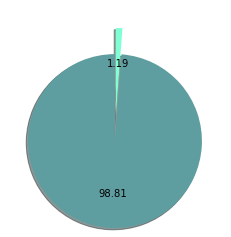

In [40]:
explode = (0.3, 0)  
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']

plt.pie(two['purchase'].value_counts(), 
        startangle=90, autopct='%.2f', shadow=True,
        explode=explode, colors=colors)
plt.show()

In [34]:
three = df[(df.competitors == 3) & ]
three.shape

(17, 20)

In [45]:
test = df[(df.competitors == 3) & (df.purchase == 0)].index
test.shape

(17,)

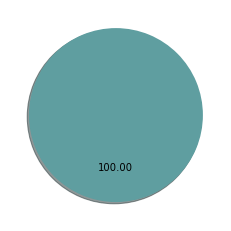

In [46]:
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']

plt.pie(three['purchase'].value_counts(), 
        startangle=90, autopct='%.2f', shadow=True, colors=colors)
plt.show()

In [9]:
train.competitors.value_counts()

0    200
1     56
2     44
3     10
Name: competitors, dtype: int64

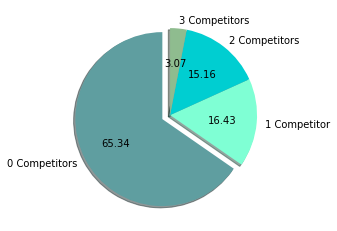

In [10]:
explode = (0.1, 0, 0, 0)  
colors = ['cadetblue','aquamarine','darkturquoise','darkseagreen']

plt.pie(df['competitors'].value_counts(), 
        startangle=90, autopct='%.2f',
        labels=['0 Competitors', '1 Competitor', '2 Competitors', 
                '3 Competitors'], shadow=True,
        explode=explode, colors=colors)
plt.show()

### Takeaways:
- 64.52% of the lead have 0 competitors for CIC to go against.

### Questions Arised:
- If such a large ratio of leads have no competitors, why is it that there is only 6.77% of leads signing on with CIC?

___

2. How many of the ones with one or more competitors are signing on with CIC?

In [11]:
bought = df[df['purchase'] == 1]
comp_bought = bought.groupby('competitors').count()
#code_reasons.sort_values(by = 'open_date', ascending = False)

comp_bought

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,provider_a,provider_b,provider_c,provider_d,lead_costs_25,lead_costs_50,lead_costs_75,lead_costs_100,competitors_0,competitors_1,competitors_2,competitors_3
competitors,,,,,,,,,,,,,,,,,,,
0,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [12]:
not_bought = df[df['purchase'] != 1]
comp_not_bought = not_bought.groupby('competitors').count()
#code_reasons.sort_values(by = 'open_date', ascending = False)

comp_not_bought

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,provider_a,provider_b,provider_c,provider_d,lead_costs_25,lead_costs_50,lead_costs_75,lead_costs_100,competitors_0,competitors_1,competitors_2,competitors_3
competitors,,,,,,,,,,,,,,,,,,,
0,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339
1,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88
2,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
3,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17


### Takeaways:
- Most of the purchases come from those with 0 competitors
- very few leads with 2+ competotors purchase with CIC
- None of the leads with 3 competitors purchased with CIC

___

### Purchase & competitors

Using a chi square test.
- I am doing this because we are drawing a comparison between 2 categorical varaibles.

Using Anova test
- I am doing this because one of the categorical variables has more than 2 categories

### Start with chi squared for competitors as a whole
#### Look at contigency tables

In [13]:
contigency = pd.crosstab(df['purchase'], df['competitors'])
contigency

competitors,0,1,2,3
purchase,,,,
0,339,88,83,17
1,23,3,1,0


In [14]:
contigency_pct = pd.crosstab(df['purchase'], df['competitors'], normalize='index')
contigency_pct

competitors,0,1,2,3
purchase,,,,
0,0.643264,0.166983,0.157495,0.032258
1,0.851852,0.111111,0.037037,0.000000


In [15]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.competitors, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the number of competitors are independent from each other"
alt_hypothesis = "The purchase and the number of competitors are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.5167
 
The alpha value is: 
 0.05


### Chi square for each individual competitor

In [16]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.competitors_0, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the number of competitors are independent from each other"
alt_hypothesis = "The purchase and the number of competitors are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.1567
 
The alpha value is: 
 0.05


In [17]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.competitors_1, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the number of competitors are independent from each other"
alt_hypothesis = "The purchase and the number of competitors are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.8927
 
The alpha value is: 
 0.05


In [18]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.competitors_2, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the number of competitors are independent from each other"
alt_hypothesis = "The purchase and the number of competitors are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.4443
 
The alpha value is: 
 0.05


In [19]:
# normlaize makes it percentage
observe = pd.crosstab(train.purchase, train.competitors_3, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The purchase with CIC and the number of competitors are independent from each other"
alt_hypothesis = "The purchase and the number of competitors are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P value is: \n', round(p,4))
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P value is: \n', round(p,4))
    print(' ')
    print(f'The alpha value is: \n', alpha)

I fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P value is: 
 0.9449
 
The alpha value is: 
 0.05


### Now for Anova test

In [20]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
alpha = 0.05
null_hypothesis = 'there is no difference in purchase between the number of competitors for a lead.'
F, p = stats.f_oneway( 
    train.purchase[train.competitors==0],
    train.purchase[train.competitors==1],
    train.purchase[train.competitors==2],
    train.purchase[train.competitors==3])
if p > alpha:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We fail to reject the null hypothesis. The null hypothesis is that there is no difference in purchase between the number of competitors for a lead.


### Check correlation

In [21]:
null_hypothesis = "There is no correlation between number of purchases and amount of competitors."
alt_hypothesis = "There is a correlation between number of purchases and amount of competitors."
confidence_level = .95
a = 1 - confidence_level
x = train.purchase
y= train.competitors

corr, p = stats.pearsonr(x, y)
print(f' The correlation between purchase and the lead duration is: \n', corr)
print(f' The P value between purchase and lead duration is: \n', p)

 The correlation between purchase and the lead duration is: 
 -0.14768186710622083
 The P value between purchase and lead duration is: 
 0.009214359686999843


In [22]:
if p < a:
    print(f"Reject null hypothesis: \n'{null_hypothesis}'")
    print(' ')
    print(f"We now move forward with our alternative hypothesis: \n'{alt_hypothesis}'")
    print(' ')
    if 0 < corr < .6:
        print("This is a weak positive correlation.")
    elif .6 < corr < 1:
        print("That is a strong positive correlation.")
    elif -.6 < corr < 0:
        print("This is a weak negative correlation.")
    elif -1 < corr < -.6:
        print("That is a strong negative correlation.")
    
else : 
    print("Fail to reject the null hypothesis.")

Reject null hypothesis: 
'There is no correlation between number of purchases and amount of competitors.'
 
We now move forward with our alternative hypothesis: 
'There is a correlation between number of purchases and amount of competitors.'
 
This is a weak negative correlation.


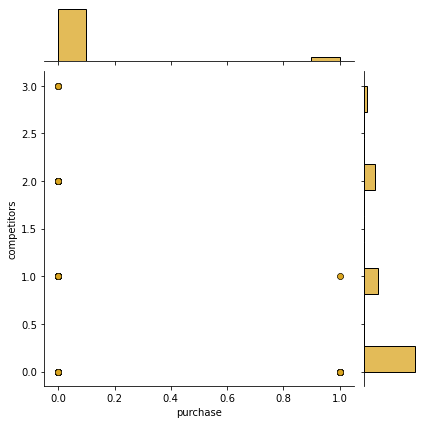

In [23]:
sns.jointplot(data=train, x='purchase', y='competitors', color='goldenrod', edgecolor='black')

___